# Results Visualization Notebook  
**Paper Title**: Optimizing QoS fulfillment of Drone Services

**Conference Submission**: International Conference on Service-Oriented Computing, 2025

**Purpose**  
This notebook is used to generate all visualizations and result plots presented in the paper. This allows the analysis of the performance of various interference resolution strategies, including proposed intervention, greedy intervention, and fairness-based intervention approaches under varying drone traffic loads. 

**Overview**  
- This notebook analyzes and compares the performance of the above approaches under varying drone traffic loads.  It plots the results for comparative analysis in terms of efficiency and effectiveness.
- The results are assumed to be saved in processed CSV files (e.g., `QoS_Summary.csv`, `CongestionSummary.csv`, `ServiceSummary.csv`, and `computation_time_log.csv`)
 
- Performance is assessed in terms of both:
  - **Effectiveness** – how well each approach meets Quality of Service (QoS) requirements such as delivery time and energy consumption.  
  - **Efficiency**- how much total computational time the algorithm takes to resolve interference across all drone delivery services using the network.

**Instructions**  
- Ensure all result CSV files are available in the same directory before running the notebook.  
- Run all cells sequentially to retrieve the results. 

**Dependencies**  
- Python 
(Ensure all required packages are installed before execution.)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

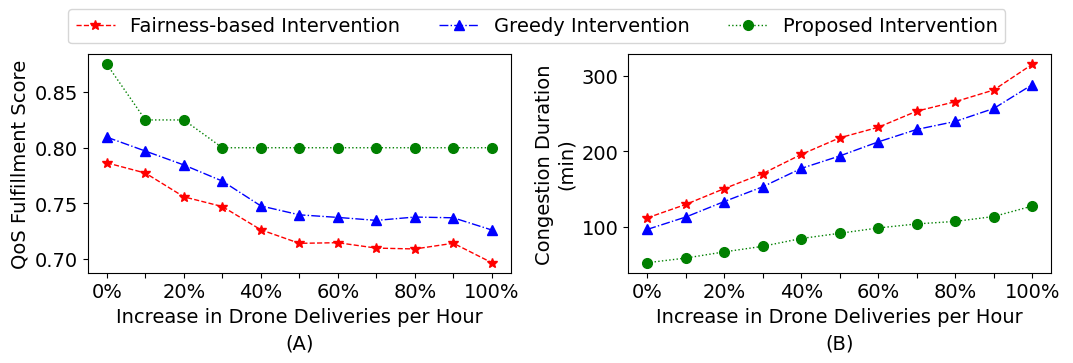

In [2]:
# Load QoS data and Congestion data
df_qos = pd.read_csv("QoS_Summary.csv")

df_qos['Approach_Name'] = df_qos['Approach_Name'].replace('No Intervention', 'Fairness-based Intervention')
df_qos['Approach_Name'] = df_qos['Approach_Name'].replace('Proposed Approach', 'Proposed Intervention')

# Average within each Random_Seed
df_qos_seed_avg = df_qos.groupby(['Approach_Name', 'Total_Requests', 'Random_Seed'], as_index=False).mean(numeric_only=True)
df_qos_avg = df_qos_seed_avg.groupby(['Approach_Name', 'Total_Requests'], as_index=False).mean(numeric_only=True)

# Map to percentage
unique_requests_qos = sorted(df_qos_avg['Total_Requests'].unique())
percentages_qos = [i * 10 for i in range(len(unique_requests_qos))]
request_to_percentage_qos = dict(zip(unique_requests_qos, percentages_qos))
df_qos_avg['Percentage'] = df_qos_avg['Total_Requests'].map(request_to_percentage_qos)

df_congestion = pd.read_csv("CongestionSummary.csv")
df_congestion['Approach_Name'] = df_congestion['Approach_Name'].replace('No Intervention', 'Fairness-based Intervention')
df_congestion['Approach_Name'] = df_congestion['Approach_Name'].replace('Proposed Approach', 'Proposed Intervention')

# Average within each Random_Seed 
df_congestion_seed_avg = df_congestion.groupby(['Approach_Name', 'Number_of_Requests', 'Random_Seed'], as_index=False).mean(numeric_only=True)
df_congestion_avg = df_congestion_seed_avg.groupby(['Approach_Name', 'Number_of_Requests'], as_index=False).mean(numeric_only=True)

# Map to percentage
unique_requests_cong = sorted(df_congestion_avg['Number_of_Requests'].unique())
percentages_cong = [i * 10 for i in range(len(unique_requests_cong))]
request_to_percentage_cong = dict(zip(unique_requests_cong, percentages_cong))
df_congestion_avg['Percentage'] = df_congestion_avg['Number_of_Requests'].map(request_to_percentage_cong)


# Define styling
markers = ['*', '^', 'o', 's', 'D', 'v', 'P', 'X']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
line_styles = ['--', '-.', ':', '-']


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

handles = []
labels = []


# Plot QoS
for idx, (name, group) in enumerate(df_qos_avg.groupby('Approach_Name')):
    marker = markers[idx % len(markers)]
    color = colors[idx % len(colors)]
    linestyle = line_styles[idx % len(line_styles)]
    line, = axs[0].plot(
        group['Percentage'],
        group['Avg_QoS_Fulfillment_Score'],
        linestyle=linestyle,
        marker=marker,
        markersize=7,
        color=color,
        label=name,
        linewidth=1
    )
    if name not in labels:
        handles.append(line)
        labels.append(name)

axs[0].set_xlabel("Increase in Drone Deliveries per Hour", fontsize=14)
axs[0].set_ylabel("QoS Fulfillment Score", fontsize=14)
axs[0].set_xticks(percentages_qos)
xtick_labels_qos = [f"{p}%" if i % 2 == 0 else "" for i, p in enumerate(percentages_qos)]
axs[0].set_xticklabels(xtick_labels_qos)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].grid(False)
axs[0].text(0.5, -0.35, '(A)', fontsize=14, ha='center', transform=axs[0].transAxes)

# Plot Congestion
for idx, (name, group) in enumerate(df_congestion_avg.groupby('Approach_Name')):
    marker = markers[idx % len(markers)]
    color = colors[idx % len(colors)]
    linestyle = line_styles[idx % len(line_styles)]
    axs[1].plot(
        group['Percentage'],
        group['Avg_Congestion_Duration'],
        linestyle=linestyle,
        marker=marker,
        markersize=7,
        color=color,
        linewidth=1
    )

axs[1].set_xlabel("Increase in Drone Deliveries per Hour", fontsize=14)
axs[1].set_ylabel("Congestion Duration\n(min)", fontsize=14)
axs[1].set_xticks(percentages_cong)
xtick_labels_cong = [f"{p}%" if i % 2 == 0 else "" for i, p in enumerate(percentages_cong)]
axs[1].set_xticklabels(xtick_labels_cong)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].grid(False)
axs[1].text(0.5, -0.35, '(B)', fontsize=14, ha='center', transform=axs[1].transAxes)

fig.legend(handles, labels, fontsize=14, loc='upper center', ncol=len(labels))
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
fig.savefig("Plot1.png", dpi=300, bbox_inches='tight')
plt.show()


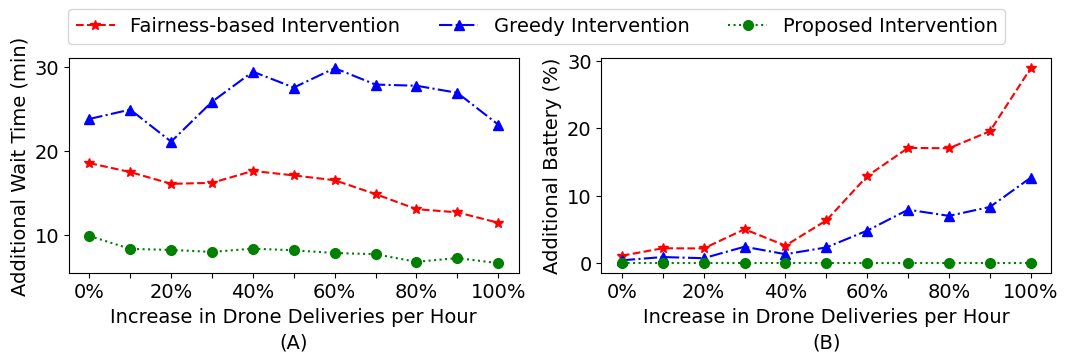

In [3]:
# Load and process ServiceSummary.csv
df_service = pd.read_csv("ServiceSummary.csv")
df_service['Approach_Name'] = df_service['Approach_Name'].replace('No Intervention', 'Fairness-based Intervention')
df_service['Approach_Name'] = df_service['Approach_Name'].replace('Proposed Approach', 'Proposed Intervention')

# Average per (Approach_Name, Total_Requests, Random_Seed)
service_avg = df_service.groupby(['Approach_Name', 'Total_Requests', 'Random_Seed'], as_index=False).mean(numeric_only=True)

# Average across seeds
service_avg = service_avg.groupby(['Approach_Name', 'Total_Requests'], as_index=False).mean(numeric_only=True)

# Add percentage column
unique_requests = sorted(service_avg['Total_Requests'].unique())
percentages = [i * 10 for i in range(len(unique_requests))]
request_to_percentage = dict(zip(unique_requests, percentages))
service_avg['Percentage'] = service_avg['Total_Requests'].map(request_to_percentage)

# Plot: Wait Time and Battery Use
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Style
markers = ['*', '^', 'o', 's', 'D', 'v', 'P', 'X']
colors = ['red', 'blue', 'green']
line_styles = ['--', '-.', ':']

# Legend tracking
handles = []
labels = []

# Plot (A): Additional Wait Time
for idx, (approach, subset) in enumerate(service_avg.groupby('Approach_Name')):
    marker = markers[idx % len(markers)]
    color = colors[idx % len(colors)]
    linestyle = line_styles[idx % len(line_styles)]
    line, = axs[0].plot(
        subset['Percentage'], subset['Avg_Partial_Wait_Time'],
        linestyle=linestyle, marker=marker, markersize=7,
        color=color, linewidth=1.5, label=approach
    )
    handles.append(line)
    labels.append(approach)

axs[0].set_xlabel("Increase in Drone Deliveries per Hour", fontsize=14)
axs[0].set_ylabel("Additional Wait Time (min)", fontsize=14)
axs[0].set_xticks(percentages)
axs[0].set_xticklabels([f"{p}%" if i % 2 == 0 else "" for i, p in enumerate(percentages)], fontsize=14)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].text(0.5, -0.35, '(A)', fontsize=14, ha='center', transform=axs[0].transAxes)

# Plot (B): Additional Battery Use
for idx, (approach, subset) in enumerate(service_avg.groupby('Approach_Name')):
    marker = markers[idx % len(markers)]
    color = colors[idx % len(colors)]
    linestyle = line_styles[idx % len(line_styles)]
    axs[1].plot(
        subset['Percentage'], subset['Avg_Partial_Battery_Use'],
        linestyle=linestyle, marker=marker, markersize=7,
        color=color, linewidth=1.5, label=approach
    )

axs[1].set_xlabel("Increase in Drone Deliveries per Hour", fontsize=14)
axs[1].set_ylabel("Additional Battery (%)", fontsize=14)
axs[1].set_xticks(percentages)
axs[1].set_xticklabels([f"{p}%" if i % 2 == 0 else "" for i, p in enumerate(percentages)], fontsize=14)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].text(0.5, -0.35, '(B)', fontsize=14, ha='center', transform=axs[1].transAxes)

fig.legend(handles, labels, fontsize=14, loc='upper center', ncol=len(labels))
plt.tight_layout(rect=[0, 0, 0.9, 0.9])
fig.savefig("Plot2.png", dpi=300, bbox_inches='tight')
plt.show()

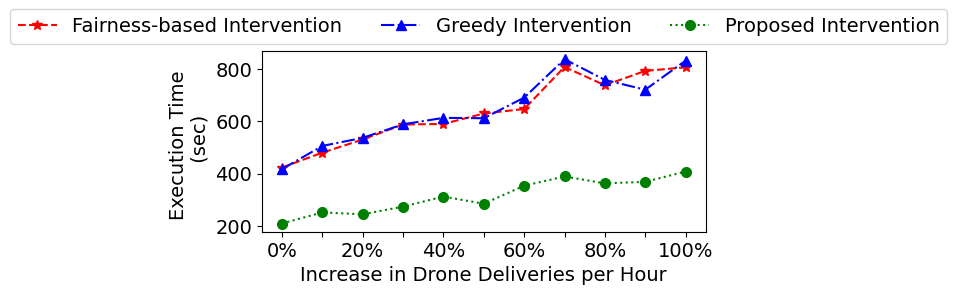

In [5]:
# Load and process computation time
df_comp = pd.read_csv("computation_time_log.csv")
df_comp['Approach_Name'] = df_comp['Approach_Name'].replace('No Intervention', 'Fairness-based Intervention')

# Average across seeds
comp_avg = df_comp.groupby(['Approach_Name', 'Number_of_Requests'], as_index=False).mean(numeric_only=True)

# Add percentage column
unique_requests = sorted(comp_avg['Number_of_Requests'].unique())
percentages = [i * 10 for i in range(len(unique_requests))]
request_to_percentage = dict(zip(unique_requests, percentages))
comp_avg['Percentage'] = comp_avg['Number_of_Requests'].map(request_to_percentage)

# Styling
markers = ['*', '^', 'o', 's', 'D', 'v', 'P', 'X']
colors = ['red', 'blue', 'green']
line_styles = ['--', '-.', ':']

# Plot: Computation Time
fig, ax = plt.subplots(figsize=(6.5, 3))
handles = []
labels = []

for idx, (approach, subset) in enumerate(comp_avg.groupby('Approach_Name')):
    marker = markers[idx % len(markers)]
    color = colors[idx % len(colors)]
    linestyle = line_styles[idx % len(line_styles)]
    line, = ax.plot(
        subset['Percentage'], subset['Computation_Time_sec'],
        linestyle=linestyle, marker=marker, markersize=7,
        color=color, linewidth=1.5, label=approach
    )
    handles.append(line)
    labels.append(approach)

ax.set_xlabel("Increase in Drone Deliveries per Hour", fontsize=14)
ax.set_ylabel("Execution Time \n (sec)", fontsize=14)
ax.set_xticks(percentages)
ax.set_xticklabels([f"{p}%" if i % 2 == 0 else "" for i, p in enumerate(percentages)], fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# legend
fig.legend(
    handles, labels,
    fontsize=14,
    loc='upper center',
    ncol=len(labels)
)

plt.tight_layout(rect=[0, 0, 0.88, 0.88]) 
fig.savefig("Plot3.png", dpi=300, bbox_inches='tight')
plt.show()